# Exercise set 2 


In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Exercise 1: Newton Cotes


The main task of this problem set is the following: for a given interval $(a,b)$ and $n+1$ equally distributed nodes $x_i = a + i \tfrac{(b-a)}{n}$
for $i=0,\ldots n$, tabulate the weights for the Newton-Cotes formula up to $n=14$.
The problem boils down to 2 task, namely 

1. Defining the Lagrange polynomials $L_{in}$ for $i=0, \ldots, n$
2. Computing the weights $ w_i = \int_a^b L_{in}(x) \,\mathrm{d}x $

__Before you start:__ For the implementation of the task, we recommend to use the [sympy](https://docs.sympy.org/latest/index.html#) python module  for symbolic mathematics to perform tasks such as (symbolic) integration.
Spend some time to browse  through the  [sympy tutorial](https://docs.sympy.org/latest/tutorial/index.html) and the [help on symbolic integration](https://docs.sympy.org/latest/modules/integrals/integrals.html). Using ```sympy``` you can for instance do something like this for $n=2$:


In [32]:
# import symbol x from sympy so that you can define symbolic functions of x
from sympy.abc import x
# import symbolic integration
from sympy import integrate 
from functools import reduce

# Define
a, b = 0, 1 
xqs = np.linspace(a,b,3)
# Define L_02 (not normalized)
L_02 = (x-xqs[1])*(x-xqs[2])
# Normalize it to satisfy l_02(x_0) = 1
L_02 = L_02/L_02.subs(x,xqs[0])

# Now integrate L_02 to compute the first weight
w_0 = integrate(L_02, (x, a, b))
print("w0 = {}".format(w_0))


w0 = 0.166666666666667


Of course, 
since you are asked to do comupute all $n+1$ weights  $n=1,\ldots,14$,
you need to automatize the construction of the corresponding Lagrange polynoms.
So proceed as follows:

__a__) Write  a python function ```lagrange_polys``` which takes a list of $n+1$ quadrature points
and returns a list of the corresponding $n+1$ Lagrange polynoms $\{L_{in}\}_{i=0}^n$
defined a symbolic function using ```sympy```:

In [36]:
from sympy.abc import x
from sympy import integrate 
from functools import reduce

def lagrange_polys(nodes):
    n = len(nodes)

    # Lager ikke-normaliserte Lagrangefunksjoner
    Ls = [reduce(lambda x,y: x*y, [x - nodes[j] for j in range(n) if j is not i]) for i in range(n)]
    
    # Normaliserer
    Ls = [Ls[i] / Ls[i].subs(x, nodes[i]) for i in range(n)]
    return Ls


__b__) Now the easy part! Employ your brand new ```def lagrange_polys``` function and implement a python function which takes as argument the desired degree of exactness $n$ and the interval end points
$a,b$ and returns a list of quadrature points $\{x_i\}_{i=0}^n$ and quadrature weights $\{w_i\}_{i=0}^n$:

In [41]:
def newton_cotes_formula(n, a, b):
    nodes = np.linspace(a,b,n+1)
    weights = np.array([integrate(L, (x, a, b)) for L in lagrange_polys(nodes)])

    return (nodes, weights)

__c__) Before you tabulate the quadrature weights with you newly implemented function, make sure that you implement them correctly. More, specifically, check for $n=1,\ldots 14$
that the computed Newton-Cotes formula has the expected degree of exactness, meaning that it integrates polynomials up to order $n$ __exactly__.

For $n$ is even, check that the corresponding Newton-Cotes rules even integrate polynomials up to order $n+1$  exactly (and not only up to $n$).

Note:  Due to floating point related errors and some numerical instabilities when computing
higher order Lagrange polynomials and integrals, the difference between the exact integral 
and the numerically error won't be 0, but around the machine precision for $n=1,2$ and then
for each increase of the order $n$ you will roughly loose of significant digit in
the difference between the two.



In [48]:
def QR(f, xq, wq):
    """ Computes an approximation of the integral f
    for a given quadrature rule.
    Input:
    f: integrand
    xq: quadrature nodes
    wq: quadrature weights
    """
    n = len(xq)
    if (n != len(wq)):
        raise RuntimeError("Error: Need same number of quadrature nodes and weigtds")
    return np.array(wq)@f(np.array(xq))

for n in range(1,15):
    print("===========================================")

    print("Newton-Cotes rules for n = {}".format(n))

    xq,wq = newton_cotes_formula(n, a, b)
    for m in range(n+2):
        print(f"Testing degree of exactness for m = {m}")
        # Define function
        def f(x):
            return x**m

        # Exact integral
        int_f = 1./(m+1)
        qr_f = QR(f, xq, wq)
        print(int_f - qr_f)


Newton-Cotes rules for n = 1
Testing degree of exactness for m = 0
0
Testing degree of exactness for m = 1
0
Testing degree of exactness for m = 2
-0.166666666666667
Newton-Cotes rules for n = 2
Testing degree of exactness for m = 0
1.11022302462516e-16
Testing degree of exactness for m = 1
0
Testing degree of exactness for m = 2
0
Testing degree of exactness for m = 3
2.77555756156289e-17
Newton-Cotes rules for n = 3
Testing degree of exactness for m = 0
-6.66133814775094e-16
Testing degree of exactness for m = 1
0
Testing degree of exactness for m = 2
1.11022302462516e-16
Testing degree of exactness for m = 3
2.22044604925031e-16
Testing degree of exactness for m = 4
-0.00370370370370346
Newton-Cotes rules for n = 4
Testing degree of exactness for m = 0
-3.55271367880050e-15
Testing degree of exactness for m = 1
-4.44089209850063e-16
Testing degree of exactness for m = 2
-5.55111512312578e-17
Testing degree of exactness for m = 3
8.32667268468867e-17
Testing degree of exactness for m

__d__) Tabulate the quadrature weights for the Newton-Cotes rule for $n=1,\ldots 14$. For which $n$  should you
refrain from using the resulting quadrature rule (and why?)

In [61]:
import pandas as pd
a, b = 0, 1

for i in range(1, 15):
    nodes, weights = newton_cotes_formula(i, a, b)
    print(f"Degree of exactness: {i}")
    table = pd.DataFrame({'Nodes': nodes, 'Weights': weights})
    display(table)

for i in range(7,15):
    neg = False
    nodes, weights = newton_cotes_formula(i, a, b)
    j = 0
    while j<len(weights) and neg == False:
        if weights[j] < 0:
            neg = True
        j += 1
    if neg == True:
        print(f'Newton-Cotes formula for n = {i} inneholder negative vekter, ikke bruk den!')


Degree of exactness: 1


,Nodes,Weights
0,0.0,0.500000000000000
1,1.0,0.500000000000000


Degree of exactness: 2


,Nodes,Weights
0,0.0,0.166666666666667
1,0.5,0.666666666666667
2,1.0,0.166666666666667


Degree of exactness: 3


,Nodes,Weights
0,0.000000,0.125000000000000
1,0.333333,0.375000000000001
2,0.666667,0.375000000000000
3,1.000000,0.125000000000000


Degree of exactness: 4


,Nodes,Weights
0,0.00,0.0777777777777793
1,0.25,0.355555555555558
2,0.50,0.133333333333333
3,0.75,0.355555555555556
4,1.00,0.0777777777777775


Degree of exactness: 5


,Nodes,Weights
0,0.0,0.0659722222222205
1,0.2,0.260416666666686
2,0.4,0.173611111111107
3,0.6,0.173611111111107
4,0.8,0.260416666666664
5,1.0,0.0659722222222237


Degree of exactness: 6


,Nodes,Weights
0,0.000000,0.0488095238095241
1,0.166667,0.257142857142867
2,0.333333,0.0321428571429614
3,0.500000,0.323809523809729
4,0.666667,0.0321428571430147
5,0.833333,0.257142857142881
6,1.000000,0.0488095238095205


Degree of exactness: 7


,Nodes,Weights
0,0.000000,0.0434606481481694
1,0.142857,0.207002314814787
2,0.285714,0.0765625000000796
3,0.428571,0.172974537037589
4,0.571429,0.172974537037579
5,0.714286,0.0765624999999375
6,0.857143,0.207002314815043
7,1.000000,0.0434606481481348


Degree of exactness: 8


,Nodes,Weights
0,0.000,0.0348853615520852
1,0.125,0.207689594356452
2,0.250,-0.0327336860646028
3,0.375,0.370229276892928
4,0.500,-0.160141093480888
5,0.625,0.370229276893951
6,0.750,-0.0327336860670293
7,0.875,0.207689594356452
8,1.000,0.0348853615519715


Degree of exactness: 9


,Nodes,Weights
0,0.000000,0.0318861607145209
1,0.111111,0.175680803567957
2,0.222222,0.0120535714081598
3,0.333333,0.215892857144354
4,0.444444,0.0644866071816068
5,0.555556,0.0644866071227170
6,0.666667,0.215892857163404
7,0.777778,0.0120535714140715
8,0.888889,0.175680803571595
9,1.000000,0.0318861607140608


Degree of exactness: 10


,Nodes,Weights
0,0.0,0.0268341483612691
1,0.1,0.177535941429596
2,0.2,-0.0810435706516728
3,0.3,0.454946288296924
4,0.4,-0.435155122890137
5,0.5,0.713764630258083
6,0.6,-0.435155122624565
7,0.7,0.454946288260544
8,0.8,-0.0810435706225938
9,0.9,0.177535941427777


Degree of exactness: 11


,Nodes,Weights
0,0.000000,0.0249332309067540
1,0.090909,0.154855358421059
2,0.181818,-0.0371692319677095
3,0.272727,0.289658254533606
4,0.363636,-0.110178089438534
5,0.454545,0.177900474518538
6,0.545455,0.177900477545336
7,0.636364,-0.110178088077191
8,0.727273,0.289658255001996
9,0.818182,-0.0371692315458176


Degree of exactness: 12


,Nodes,Weights
0,0.000000,0.0216394874748858
1,0.083333,0.157036107149906
2,0.166667,-0.120321964845061
3,0.250000,0.566498902626336
4,0.333333,-0.816505640745163
5,0.416667,1.38775966875255
6,0.500000,-1.39221312757581
7,0.583333,1.38775965528293
8,0.666667,-0.816505642607808
9,0.750000,0.566498898688678


Degree of exactness: 13


,Nodes,Weights
0,0.000000,0.0203347190399654
1,0.076923,0.139876085449941
2,0.153846,-0.0777118687983602
3,0.230769,0.387896172702312
4,0.307692,-0.376923718198668
5,0.384615,0.513676267117262
6,0.461538,-0.107147514820099
7,0.538462,-0.107147432863712
8,0.615385,0.513676196336746
9,0.692308,-0.376923809408254


Degree of exactness: 14


,Nodes,Weights
0,0.000000,0.0180344710606732
1,0.071429,0.142087798332796
2,0.142857,-0.154025308787823
3,0.214286,0.699748912422365
4,0.285714,-1.32399774342775
5,0.357143,2.52407783269882
6,0.428571,-3.35786452144384
7,0.500000,3.90387558670773
8,0.571429,-3.35786485671997
9,0.642857,2.52407777309418


Newton-Cotes formula for n = 8 inneholder negative vekter, ikke bruk den!
Newton-Cotes formula for n = 10 inneholder negative vekter, ikke bruk den!
Newton-Cotes formula for n = 11 inneholder negative vekter, ikke bruk den!
Newton-Cotes formula for n = 12 inneholder negative vekter, ikke bruk den!
Newton-Cotes formula for n = 13 inneholder negative vekter, ikke bruk den!
Newton-Cotes formula for n = 14 inneholder negative vekter, ikke bruk den!


## Exercise 2: composite Simpson's rule
Simpson's rule is defined as
$$
S[f](x_{i-1}, x_i) = \frac{h}{6}(f(x_{i-1}) + 4f(x_{i-1/2}) + f(x_i))
$$
where $h = x_i - x_{i-1}$ and $x_{i-1/2} = \frac{x_{i-1}+x_i}{2}.$


**a)**

Show that the resulting composite Simpson's rule is given by

\begin{align*}
\int_a^b f {\,\mathrm{d}x} \approx \mathrm{CSR}[f]({[x_{i-1}, x_i]}_{i=1}^{m})
&= 
\tfrac{h}{6}
[
f(x_0)
+ 4f(x_{x_{1/2}}) + 2f(x_1) 
+ 4f(x_{3/2}) +     2f(x_2)
+ \ldots
\\ 
&\qquad+2 f(x_{m-1})
+
4f(x_{x_{m-1/2}}) 
+f(x_m)
].
\end{align*}

\begin{align*}
\mathrm{CSR}[f]({[x_{i-1}, x_i]}_{i=1}^{m})
&= \sum_{i=1}^m S[f](x_{i-1},x_i) \\
&= \sum_{i=1}^m \frac{h}{6}(f(x_{i-1}) + 4f(x_{i-1/2}) + f(x_i)) \\
&= \frac{h}{6}(f(x_{0}) + 4f(x_{1/2}) + f(x_1)) + \frac{h}{6}(f(x_{1}) + 4f(x_{3/2}) + f(x_2)) + \dots \\
&+ \frac{h}{6}(f(x_{m-2}) + 4f(x_{m-3/2}) + f(x_{m-1})) + \frac{h}{6}(f(x_{m-1}) + 4f(x_{m-1/2}) + f(x_m)) \\
&= \frac{h}{6} (f(x_0) + 4f(x_{1/2}) + 2f(x_1) + 4f(x_{3/2}) + 2f(x_2) + \dots + 2f(x_{m-1}) + 4f(x_{m-1/2}) + f(x_m))
\end{align*}

**b)**
Implement the composite Simpson's rule.
Use this function to compute an approximated value of the integral

$$
I(0,1) = \int_0^1 \tan\left(\frac{\pi}{4}x\right) = 2\frac{\log(2)}{\pi} = 0.4412712\dotsc.
$$

for $m = 4, 8, 16, 32, 64$ corresponding to
$ h = 2^{-2}, 2^{-3}, 2^{-4}, 2^{-5}, 2^{-6}$.
Tabulate the corresponding quadrature errors $|I(0,1) - \mathrm{CSR}[f]({[x_{i-1}, x_i]}_{i=1}^{m})|$. Plot the errors against $h$ in a $\log-\log$
plot and determine the EOC ("Experimental Order of Convergence")
How does it compare to the composite trapezoidal rule?

Number of subintervals m = 4
Q[f] = 0.44128004959666406
|I[f] - Q[f]| = 8.8492913609e-06
Number of subintervals m = 8
Q[f] = 0.44127176953217295
|I[f] - Q[f]| = 5.6922686975e-07
Number of subintervals m = 16
Q[f] = 0.4412712361500305
|I[f] - Q[f]| = 3.5844727297e-08
Number of subintervals m = 32
Q[f] = 0.44127120254985497
|I[f] - Q[f]| = 2.2445517667e-09
Number of subintervals m = 64
Q[f] = 0.4412712004456544
|I[f] - Q[f]| = 1.4035117513e-10


,Error,EOC
0,8.849291e-06,inf
1,5.692269e-07,3.958486
2,3.584473e-08,3.989171
3,2.244552e-09,3.997262
4,1.403512e-10,3.999314


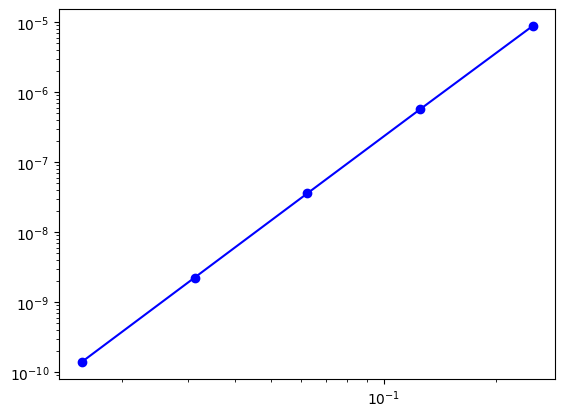

In [79]:
# Funksjon for composite Simpson's rule
def CS(f, a, b, m):
    
    # Define all the end points of the sub-intervals
    x = np.linspace(a, b, m+1) 
    h = float(b - a)/m
    
    # Define the steps in between, the x_{i-1/2}. Note that there are only m points.
    x_half = np.linspace(a+h/2, b-h/2, m)
    
    fx = f(x[1:-1]) # We treat x_0 and x_m separately from x_1,...,x_{m-1}
    fx_half = f(x_half)
    
    return h/6*(f(a) + 2*sum(fx) + 4*sum(fx_half) +f(b))


import matplotlib.pyplot as plt

def f(x):
    return np.tan(x*np.pi/4)

# Eksakt
int_f = 2*np.log(2)/np.pi

# Interval
a, b = 0, 1

errs = []
hs = []

# Compute integral numerically
for m in [4, 8, 16, 32, 64]:
    print("================================")
    cqr_f = CS(f, a, b, m)
    print("Number of subintervals m = {}".format(m))
    print("Q[f] = {}".format(cqr_f))
    err = abs(int_f - cqr_f)
    errs.append(err)
    hs.append((b-a)/m)
    print("|I[f] - Q[f]| = {:.10e}".format(err))

hs = np.array(hs)
errs = np.array(errs)
eoc = np.log(errs[1:]/errs[:-1])/np.log(hs[1:]/hs[:-1])
eoc = np.insert(eoc,0,'inf')
table = pd.DataFrame({'Error': errs, 'EOC': eoc})
display(table)

plt.loglog(hs, errs, "bo-")
plt.show()


**c)**
Recall that the error of Simpson's rule on a single interval is given by

$$
|I[f](a,b) - S[f](a,b)| = - \frac{(b-a)^5}{2880}  f^{(4)}(\xi)
$$
for some $\xi \in [a,b]$.

Use this to show that the error of the composite Simpson rule can be bounded by

\begin{equation}
|I[f]-\mathrm{CSR}[f]|
\leqslant
\dfrac{M_4}{2880} \dfrac{(b-a)^5}{m^4}
=
\dfrac{M_4}{2880}
h^4(b-a)
\end{equation}

where  $M_4 = \max_{\xi\in[a,b]} |f^{(4)}(\xi)|$. Does your numerical experiments from b) support the theoretically derived convergence order?

**d)** Redo the numerical experiment from b), but this time, use the composite Simpson rule to 
compute approximated values of the integral

$$
\int_0^1 \sqrt{1-x^2} dx = \dfrac{\pi}{4}.
$$
What EOC do you obtain? Do you have an explanation for reduced convergence order?

**Hint.** Have a look a $f'$, e.g. by plotting $f'$ over intervals $[0,b]$ with $0 < b < 1$ but $b$ very close to $1$, e.g. $b=0.9999$  

## Exercise 3: composite Gauss-Legandre

Gauss-Legandre on the interval $[-1,1]$ is defined as 
$$
GL[f](-1, 1) =f(1/\sqrt{3}) + f(-1/\sqrt{3})
$$


__a__) Transfer the quadrature points and weights to an arbitrary interval $[x_{i-1},x_{i}]$, and show that the composite Gauss-Legandre rule is given by: 


\begin{align*}
\int_a^b f {\,\mathrm{d}x} \approx \mathrm{CGL}[f]({[x_{i-1}, x_i]}_{i=1}^{m})
&= 
\frac{h}{2}\sum_{i=1}^m \left( f\left(\frac{x_i + x_{i-1}}{2} + \frac{x_i - x_{i-1}}{2\sqrt{3}}\right) +  f\left(\frac{x_i + x_{i-1}}{2} - \frac{x_i - x_{i-1}}{2\sqrt{3}} \right) \right) .
\end{align*}

where $h = x_i - x_{i-1}$

__b__) Implement the composite Gauss-Legandre and determine the EOC as you did in exercise 2b)